## Build a simple trading strategy 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA10 and MA50

In [9]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
# fb = pd.DataFrame.from_csv('../data/facebook.csv')    // original code
# James code below: ref: https://stackoverflow.com/questions/34087903/dataframe-object-has-no-attribute-read-csv
fb = pd.read_csv('../data/facebook.csv') 
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
49,2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
50,2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
51,2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
52,2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
53,2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


### 2. Add "Shares" column to make decisions base on the strategy 

In [14]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]


,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
49,2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648000,21.017400,1,22.969999,0.269998,0.269998
50,2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685000,21.075800,1,23.250000,0.280001,0.549999
51,2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792000,21.138200,1,22.870001,-0.379999,0.170000
52,2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836000,21.199800,1,23.219999,0.349998,0.519998
53,2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872000,21.280400,1,23.469999,0.250000,0.769998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005


# 2.1 the associated tutorial on 'pd.loc[index, value]'   method 

https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/


# 2.2 Tut:  Indexing DF in Pandas

https://www.dataquest.io/blog/tutorial-indexing-dataframes-in-pandas/

In [ ]:
#

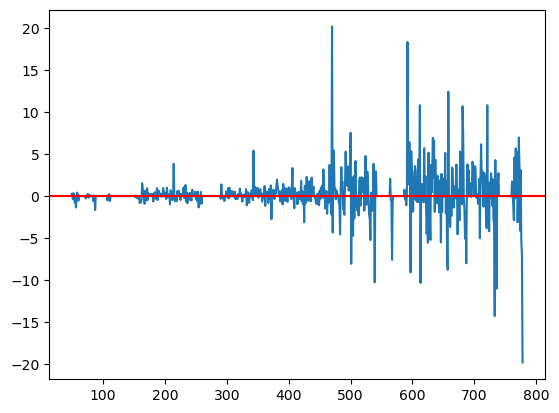

In [11]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [12]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

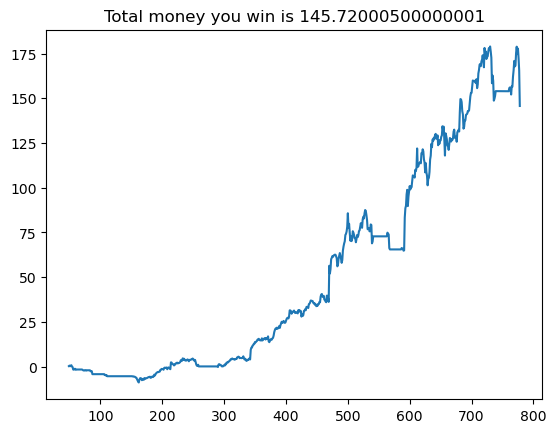

In [13]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).

In [9]:
#import MS's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684


In [10]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

ms['Shares'] = [1 if ms.loc[ei, 'MA10']>ms.loc[ei, 'MA50'] else 0 for ei in ms.index]

In [12]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034,0
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056,0
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044,0
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278,0
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606,0


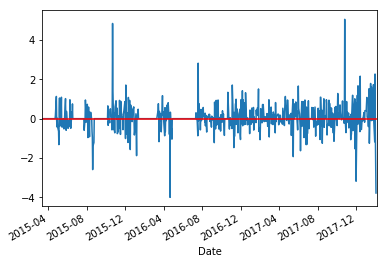

In [13]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [14]:
#Use .cumsum() to calculate the accumulated wealth over the period

ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


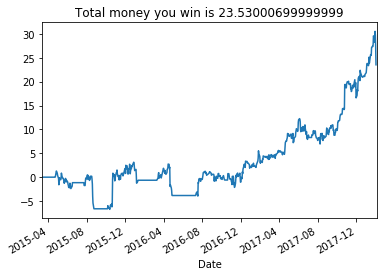

In [15]:
#plot the wealth to show the growth of profit over the period

ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[fb.index[-2], 'wealth']))